In [120]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex, LogNorm
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase

from matplotlib.colors import LogNorm
import pylab
%pylab inline
pylab.rcParams['figure.figsize'] = (12.0, 9.0)

Populating the interactive namespace from numpy and matplotlib


/Users/ekpease/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [121]:
# Electric power sales, revenue, and energy efficiency Form EIA-861 detailed data files 
# https://www.eia.gov/electricity/data/eia861/ (Accessed April 6, 2018)
# Data from 2016 (for this example)

# Load in Reliability data from excel document
test = pd.read_excel('/Users/ekpease/Data/f8612016/Reliability_2016.xlsx',header=1,skip_footer=1,\
                     usecols=np.arange(14))

# Replace non-numeric elements with zeros
test['Number of Customers'] = test['Number of Customers'].replace('.',0)
test['SAIDI With MED'] = test['SAIDI With MED'].replace('.',-99)
test['SAIFI With MED'] = test['SAIFI With MED'].replace('.',-99)

In [122]:
utilities_basicinfo = test.as_matrix(columns=['State','Number of Customers','Ownership','SAIDI With MED','SAIFI With MED'])
short_state_names = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

populations = {
    'California': 39536653,
    'Texas': 28304596,
    'Florida': 20984400,
    'New York': 19849399,
    'Pennsylvania': 12805537,
    'Illinois': 12802023,
    'Ohio': 11658609,
    'Georgia': 10429379,
    'North Carolina': 10273419,
    'Michigan': 9962311,
    'New Jersey': 9005644,
    'Virginia': 8470020,
    'Washington': 7405743,
    'Arizona': 7016270,
    'Massachusetts': 6859819,
    'Tennessee': 6715984,
    'Indiana': 6666818,
    'Missouri': 6113532,
    'Maryland': 6052177,
    'Wisconsin': 5795483,
    'Colorado': 5607154,
    'Minnesota': 5576606,
    'South Carolina': 5024369,
    'Alabama': 4874747,
    'Louisiana': 4684333,
    'Kentucky': 4454189,
    'Oregon': 4142776,
    'Oklahoma': 3930864,
    'Connecticut': 3588184,
    'Iowa': 3145711,
    'Utah': 3101833,
    'Arkansas': 3004279,
    'Nevada': 2998039,
    'Mississippi': 2984100,
    'Kansas': 2913123,
    'New Mexico': 2088070,
    'Nebraska': 1920076,
    'West Virginia': 1815857,
    'Idaho': 1716943,
    'Hawaii': 1427538,
    'New Hampshire': 1342795,
    'Maine': 1335907,
    'Rhode Island': 1059639,
    'Montana': 1050493,
    'Delaware': 961939,
    'South Dakota': 869666,
    'North Dakota': 755393,
    'Alaska': 739795,
    'Vermont': 623657,
    'Wyoming': 579315,
    'District of Columbia': 693972
}

In [123]:
# loop through short names
# for each name, write two elements: 0==long name, 1==sum(number of customers with state name==short name)
utilkeys = ['State','Customers','Type','SAIDI','SAIFI']
utilDict = dict()
for ii in range(5):
    utilDict[utilkeys[ii]]=utilities_basicinfo[:,ii][(utilities_basicinfo[:,1]>0)]
for ii in range(len(utilDict['State'])):
    utilDict['State'][ii] = short_state_names[utilDict['State'][ii]]
for item in utilDict.keys():
    utilDict[item] = np.asarray(utilDict[item])
    
statekeys = ['State','TotalCustomers','Population','avgSAIDI','avgSAIFI']
stateDict = {key: [] for key in statekeys}
for stateXX in np.unique(utilities_basicinfo[:,0]):
    stateDict['State'].append(short_state_names[stateXX])
    stateDict['TotalCustomers'].append(sum(utilities_basicinfo[:,1][utilities_basicinfo[:,0]==stateXX]))
    stateDict['Population'].append(populations[short_state_names[stateXX]])
    stateDict['avgSAIDI'].append(sum((utilDict['Customers']*utilDict['SAIDI'])[(utilDict['State']==short_state_names[stateXX]) & (utilDict['SAIDI']>=0)])/sum(utilDict['Customers'][(utilDict['State']==short_state_names[stateXX]) & (utilDict['SAIDI']>=0)]))
    stateDict['avgSAIFI'].append(sum((utilDict['Customers']*utilDict['SAIFI'])[(utilDict['State']==short_state_names[stateXX]) & (utilDict['SAIFI']>=0)])/sum(utilDict['Customers'][(utilDict['State']==short_state_names[stateXX]) & (utilDict['SAIFI']>=0)]))
for item in stateDict.keys():
    stateDict[item] = np.asarray(stateDict[item])

How many customers are included in these data?

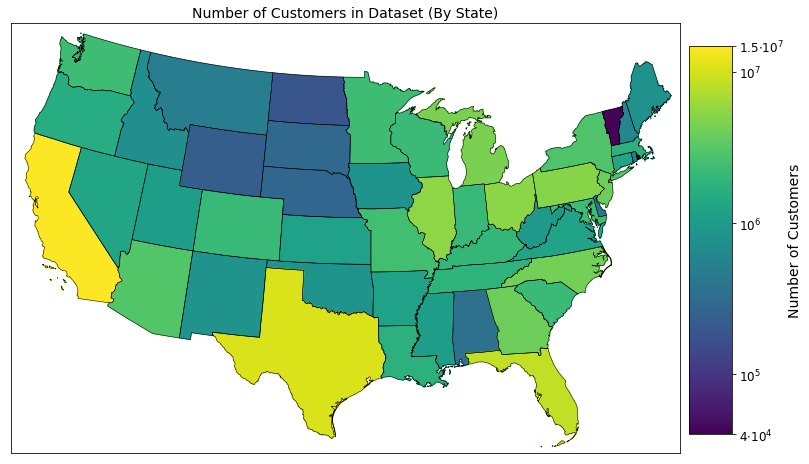

In [125]:
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.readshapefile('/Users/ekpease/Downloads/cb_2017_us_state_5m/cb_2017_us_state_5m', name='states', drawbounds=True)

cmap = plt.cm.viridis
statenames = []
stateDict['map_color_tot'] = np.zeros([len(stateDict['State']),4])
stateDict['map_color_frac'] = np.zeros([len(stateDict['State']),4])
stateDict['map_color_SAIDI'] = np.zeros([len(stateDict['State']),4])
stateDict['map_color_SAIFI'] = np.zeros([len(stateDict['State']),4])
max_log10 = np.log10(15000000)
min_log10 = np.log10(40000)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    if statename in stateDict['State']:
        stateDict['map_color_tot'][stateDict['State']==statename] = cmap((np.log10(stateDict['TotalCustomers'][stateDict['State']==statename])-min_log10)/(max_log10-min_log10))[:3]
        stateDict['map_color_frac'][stateDict['State']==statename] = cmap(stateDict['TotalCustomers'][stateDict['State']==statename]/(0.6*stateDict['Population'][stateDict['State']==statename]))[:3]
        stateDict['map_color_SAIDI'][stateDict['State']==statename] = cmap(stateDict['avgSAIDI'][stateDict['State']==statename]/1000)[:3]
        stateDict['map_color_SAIFI'][stateDict['State']==statename] = cmap(stateDict['avgSAIFI'][stateDict['State']==statename]/max(stateDict['avgSAIFI']))[:3]
    statenames.append(statename)

ax = plt.gca() # get current axes instance
fig = plt.gcf()    
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] in stateDict['State']:
        color = rgb2hex(stateDict['map_color_tot'][stateDict['State']==statenames[nshape]].ravel()) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
plt.title('Number of Customers in Dataset (By State)',fontsize=14)
cax = fig.add_axes([0.91, 0.2, 0.05, 0.6]) # posititon
cb = ColorbarBase(cax,cmap=cmap,orientation='vertical')
cb.set_label('Number of Customers',fontsize=14)
cb.set_ticks([0,((5.0-min_log10)/(max_log10-min_log10)),((6.0-min_log10)/(max_log10-min_log10)),((7.0-min_log10)/(max_log10-min_log10)),1])
cb.set_ticklabels(['4$\cdot$10$^4$','10$^5$','10$^6$','10$^7$','1.5$\cdot$10$^7$'])
cb.ax.tick_params(labelsize=12)
plt.show()

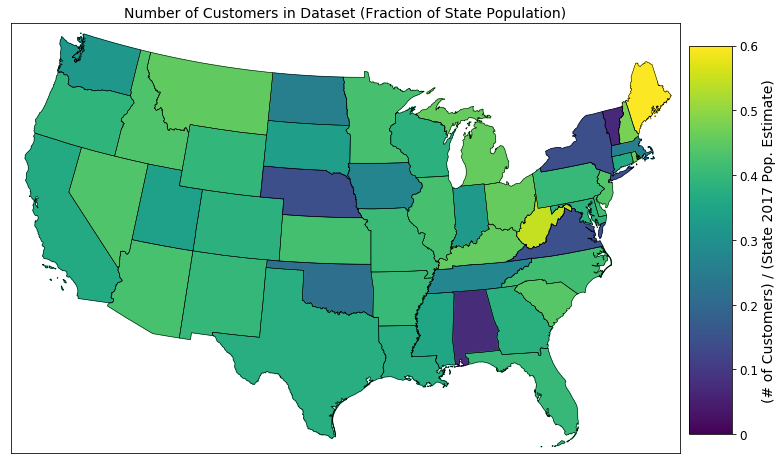

In [126]:
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.readshapefile('/Users/ekpease/Downloads/cb_2017_us_state_5m/cb_2017_us_state_5m', name='states', drawbounds=True)
ax = plt.gca() # get current axes instance
fig = plt.gcf()    
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] in stateDict['State']:
        color = rgb2hex(stateDict['map_color_frac'][stateDict['State']==statenames[nshape]].ravel()) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
plt.title('Number of Customers in Dataset (Fraction of State Population)',fontsize=14)
cax = fig.add_axes([0.91, 0.2, 0.05, 0.6]) # posititon
cb = ColorbarBase(cax,cmap=cmap,orientation='vertical')
cb.set_label('(# of Customers) / (State 2017 Pop. Estimate)',fontsize=14)
cb.set_ticks([0,0.167,0.333,0.5,0.667,0.833,1])
cb.set_ticklabels(['0','0.1','0.2','0.3','0.4','0.5','0.6'])
cb.ax.tick_params(labelsize=12)
plt.show()

Plots of reliability...

SAIDI with MED: Average yearly duration of outages, in minutes, including major event days

SAIFI with MED: Average yearly frequency of outages, including major event days

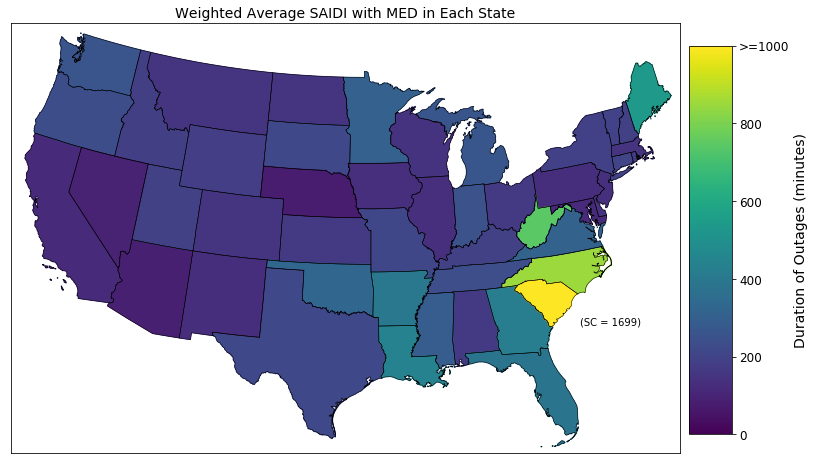

In [127]:
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.readshapefile('/Users/ekpease/Downloads/cb_2017_us_state_5m/cb_2017_us_state_5m', name='states', drawbounds=True)
ax = plt.gca() # get current axes instance
fig = plt.gcf()    
for nshape,seg in enumerate(m.states):
    if statenames[nshape] in stateDict['State']:
        color = rgb2hex(stateDict['map_color_SAIDI'][stateDict['State']==statenames[nshape]].ravel()) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
plt.annotate('(SC = 1699)', xy=(0.85, 0.3), xycoords='axes fraction')
plt.title('Weighted Average SAIDI with MED in Each State',fontsize=14)
cax = fig.add_axes([0.91, 0.2, 0.05, 0.6]) # posititon
cb = ColorbarBase(cax,cmap=cmap,orientation='vertical')
cb.set_label('Duration of Outages (minutes)',fontsize=14)
cb.set_ticks([0,0.2,0.4,0.6,0.8,1])
# maxSAIDI=np.round(max(stateDict['avgSAIDI']),decimals=-1)
maxSAIDI=1000
cb.set_ticklabels(['0',str(int(0.2*maxSAIDI)),str(int(0.4*maxSAIDI)),str(int(0.6*maxSAIDI)),\
                   str(int(0.8*maxSAIDI)),'>='+str(int(maxSAIDI))])
cb.ax.tick_params(labelsize=12)
plt.show()

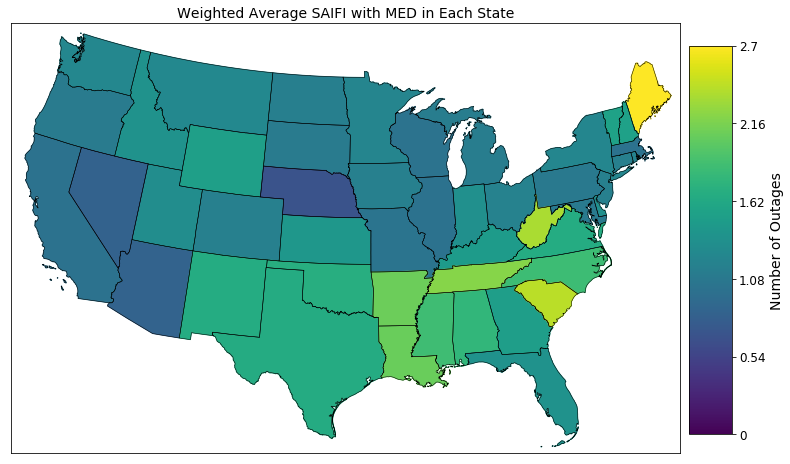

In [128]:
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.readshapefile('/Users/ekpease/Downloads/cb_2017_us_state_5m/cb_2017_us_state_5m', name='states', drawbounds=True)
ax = plt.gca() # get current axes instance
fig = plt.gcf()    
for nshape,seg in enumerate(m.states):
    if statenames[nshape] in stateDict['State']:
        color = rgb2hex(stateDict['map_color_SAIFI'][stateDict['State']==statenames[nshape]].ravel()) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
plt.title('Weighted Average SAIFI with MED in Each State',fontsize=14)
cax = fig.add_axes([0.91, 0.2, 0.05, 0.6]) # posititon
cb = ColorbarBase(cax,cmap=cmap,orientation='vertical')
cb.set_label('Number of Outages',fontsize=14)
cb.set_ticks([0,0.2,0.4,0.6,0.8,1])
maxSAIFI=np.round(max(stateDict['avgSAIFI']),decimals=1)
cb.set_ticklabels(['0',str(0.2*maxSAIFI),str(0.4*maxSAIFI),str(0.6*maxSAIFI),str(0.8*maxSAIFI),str(maxSAIFI)])
cb.ax.tick_params(labelsize=12)
plt.show()

Which type of Utility is the most reliable?

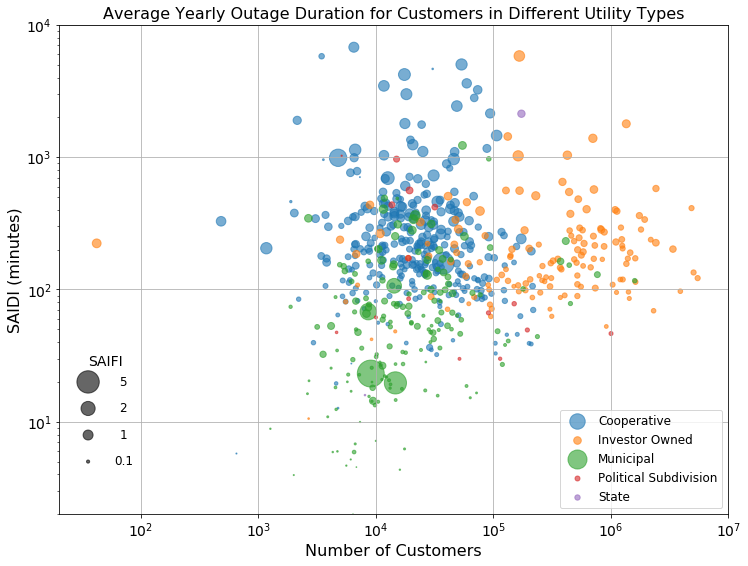

In [194]:
plt.figure()
plt.xlim(1.3,7); plt.ylim(2,10**4);
plt.yscale('log'); plt.xticks([2,3,4,5,6,7],['10$^2$','10$^3$','10$^4$','10$^5$','10$^6$','10$^7$'],fontsize=14);
plt.yticks(fontsize=14); plt.grid();
for iterType in np.unique(utilDict['Type']):
    x= np.log10(utilDict['Customers'][(utilDict['Type']==iterType) & (utilDict['SAIDI']>=0) & (utilDict['SAIFI']>=0)].astype(float))
    y= utilDict['SAIDI'][(utilDict['Type']==iterType) & (utilDict['SAIDI']>=0) & (utilDict['SAIFI']>=0)].astype(float)
    s_plt= utilDict['SAIFI'][(utilDict['Type']==iterType) & (utilDict['SAIDI']>=0) & (utilDict['SAIFI']>=0)].astype(float)
    plt.scatter(x,y,s=100.0*s_plt,marker ='.',alpha=0.6,label=iterType)
    
plt.scatter(1.55*np.ones(4),logspace(np.log10(5),np.log10(20),4),s=[10, 100, 200, 500],c='k',alpha=0.6)
plt.text(1.85,logspace(np.log10(5),np.log10(20),4)[0],'0.1',horizontalalignment='center',verticalalignment='center',fontsize=12)
plt.text(1.85,logspace(np.log10(5),np.log10(20),4)[1],'1',horizontalalignment='center',verticalalignment='center',fontsize=12)
plt.text(1.85,logspace(np.log10(5),np.log10(20),4)[2],'2',horizontalalignment='center',verticalalignment='center',fontsize=12)
plt.text(1.85,logspace(np.log10(5),np.log10(20),4)[3],'5',horizontalalignment='center',verticalalignment='center',fontsize=12)
plt.text(1.7,25,'SAIFI',horizontalalignment='center',verticalalignment='bottom',fontsize=14)
plt.legend(fontsize=12,loc='lower right');
plt.ylabel('SAIDI (minutes)',fontsize=16);
plt.xlabel('Number of Customers',fontsize=16);
plt.title('Average Yearly Outage Duration for Customers in Different Utility Types',fontsize=16)

Try to control for state-by-state variation by looking at SAIDI and SAIFI of individual utilities relative to their state's average

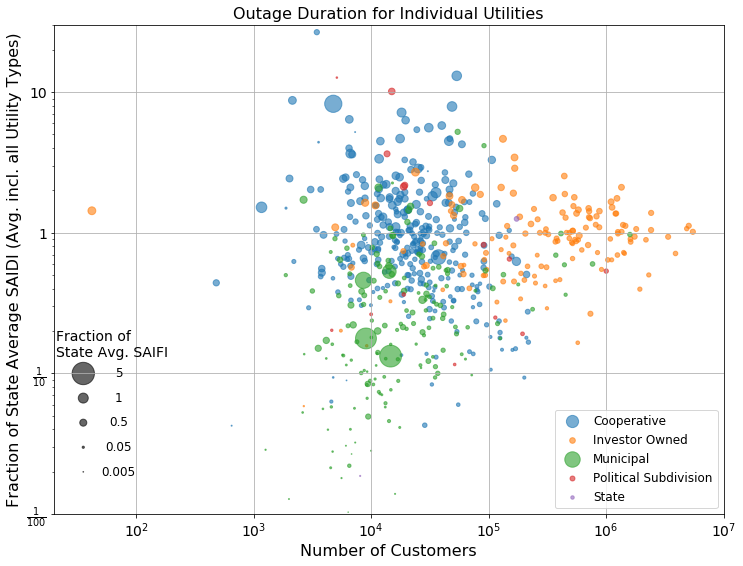

In [215]:
utilDict['SAIDI_rel'] = -99999.0*np.ones_like(utilDict['SAIDI'].astype(float))
utilDict['SAIFI_rel'] = -99999.0*np.ones_like(utilDict['SAIFI'].astype(float))
for stateIter in stateDict['State']:
    utilDict['SAIDI_rel'][utilDict['State']==stateIter] = (utilDict['SAIDI'][utilDict['State']==stateIter].astype(float))/(stateDict['avgSAIDI'][stateDict['State']==stateIter])
    utilDict['SAIFI_rel'][utilDict['State']==stateIter] = (utilDict['SAIFI'][utilDict['State']==stateIter].astype(float))/(stateDict['avgSAIFI'][stateDict['State']==stateIter])

plt.figure()
plt.xlim(1.3,7); plt.ylim(0.01,30);
plt.yscale('log');
plt.xticks([2,3,4,5,6,7],['10$^2$','10$^3$','10$^4$','10$^5$','10$^6$','10$^7$'],fontsize=14);
plt.yticks([0.01,0.1,1,10],[r'$\frac{1}{100}$',r'$\frac{1}{10}$','1','10'],fontsize=14); plt.grid();
for iterType in np.unique(utilDict['Type']):
    x= np.log10(utilDict['Customers'][(utilDict['Type']==iterType) & (utilDict['SAIDI']>=0) & (utilDict['SAIFI']>=0)].astype(float))
    y= utilDict['SAIDI_rel'][(utilDict['Type']==iterType) & (utilDict['SAIDI']>=0) & (utilDict['SAIFI']>=0)].astype(float)
    s_plt= utilDict['SAIFI_rel'][(utilDict['Type']==iterType) & (utilDict['SAIDI']>=0) & (utilDict['SAIFI']>=0)].astype(float)
    plt.scatter(x,y,s=100.0*s_plt,marker ='.',alpha=0.6,label=iterType)
    
plt.scatter(1.55*np.ones(5),logspace(np.log10(0.02),np.log10(0.1),5),s=[0.5, 5, 50, 100, 500],c='k',alpha=0.6)
plt.text(1.85,logspace(np.log10(0.02),np.log10(0.1),5)[0],'0.005',horizontalalignment='center',verticalalignment='center',fontsize=12)
plt.text(1.85,logspace(np.log10(0.02),np.log10(0.1),5)[1],'0.05',horizontalalignment='center',verticalalignment='center',fontsize=12)
plt.text(1.85,logspace(np.log10(0.02),np.log10(0.1),5)[2],'0.5',horizontalalignment='center',verticalalignment='center',fontsize=12)
plt.text(1.85,logspace(np.log10(0.02),np.log10(0.1),5)[3],'1',horizontalalignment='center',verticalalignment='center',fontsize=12)
plt.text(1.85,logspace(np.log10(0.02),np.log10(0.1),5)[4],'5',horizontalalignment='center',verticalalignment='center',fontsize=12)
plt.text(1.32,0.125,'Fraction of\nState Avg. SAIFI',horizontalalignment='left',verticalalignment='bottom',fontsize=14)
plt.legend(fontsize=12,loc='lower right');
plt.ylabel('Fraction of State Average SAIDI (Avg. incl. all Utility Types)',fontsize=16);
plt.xlabel('Number of Customers',fontsize=16);
plt.title('Outage Duration for Individual Utilities',fontsize=16)

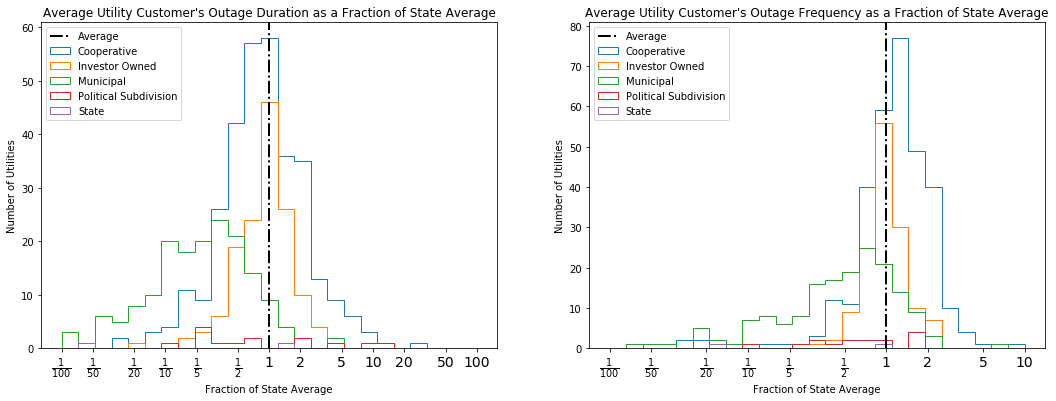

In [231]:
pylab.rcParams['figure.figsize'] = (18.0, 6.0)
plt.figure()
plt.subplot(1,2,1)
for iterType in np.unique(utilDict['Type']):
    plt.hist(np.log10(utilDict['SAIDI_rel'][(utilDict['Type']==iterType) & (utilDict['SAIDI']>=0) & (utilDict['SAIFI']>=0)].astype(float)),\
             25,[-2,2],histtype='step',label=iterType)
ylim = plt.ylim()
plt.plot([0,0],ylim,'-.k',linewidth=2,label='Average')
plt.ylim(ylim)
plt.legend(loc='upper left')
plt.ylabel('Number of Utilities'); plt.xlabel('Fraction of State Average')
plt.xticks([-2,np.log10(0.02),np.log10(0.05),-1,np.log10(0.2),np.log10(0.5),0,np.log10(2),np.log10(5),1,np.log10(20),np.log10(50),2],\
           [r'$\frac{1}{100}$',r'$\frac{1}{50}$',r'$\frac{1}{20}$',r'$\frac{1}{10}$',r'$\frac{1}{5}$',r'$\frac{1}{2}$','1','2','5','10','20','50','100'],fontsize=14);
plt.title('Average Utility Customer\'s Outage Duration as a Fraction of State Average')
plt.subplot(1,2,2)
for iterType in np.unique(utilDict['Type']):
    plt.hist(np.log10(utilDict['SAIFI_rel'][(utilDict['Type']==iterType) & (utilDict['SAIDI']>=0) & (utilDict['SAIFI']>=0)].astype(float)),\
             25,[-2,1],histtype='step',label=iterType)
ylim = plt.ylim()
plt.plot([0,0],ylim,'-.k',linewidth=2,label='Average')
plt.ylim(ylim)
plt.legend(loc='upper left')
plt.ylabel('Number of Utilities'); plt.xlabel('Fraction of State Average')
plt.xticks([-2,np.log10(0.02),np.log10(0.05),-1,np.log10(0.2),np.log10(0.5),0,np.log10(2),np.log10(5),1],\
           [r'$\frac{1}{100}$',r'$\frac{1}{50}$',r'$\frac{1}{20}$',r'$\frac{1}{10}$',r'$\frac{1}{5}$',r'$\frac{1}{2}$','1','2','5','10'],fontsize=14);
plt.title('Average Utility Customer\'s Outage Frequency as a Fraction of State Average')
